In [1]:
import septentrio_tools as st
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
inputFile1 = "ljic2800.20_.ismr"
inputFile2 = "ljic2810.20_.ismr"

In [3]:
def process_df(input_file):
    h = st.ProcessISMR()
    # Read and normalize 
    h.read_file(input_file)
    h.normalize_df()
    # Rename the Elev column
    columnas = ["Elev", "S4_sig1", "S4_sig1_corr", "S4_sig2", "S4_sig2_corr", "S4_sig3", "S4_sig3_corr"]
    h.rename_column(5, columnas[0])
    # Rename the s4 columns
    h.rename_column(7, columnas[1])
    h.rename_column(8, columnas[2])
    h.rename_column(32, columnas[3])
    h.rename_column(33, columnas[4])
    h.rename_column(46, columnas[5])
    h.rename_column(47, columnas[6])
    # Extract certain columns 
    h.extract_columns(cols=columnas)
    # Convert to float 
    h.convert2float(cols=columnas)
    # Assign the df 
    df2 = h.df
    # Calculate the corrected S4
    def get_correctedS4(row):
        s4 = row[0]
        correction= row[1]

        # Treat nan numbers 
        if pd.isnull(s4) or pd.isnull(correction):
            return np.nan
        else:
            # Calculate the corrected S4
            x = s4**2-correction**2
            if x>0:
                return x**0.5
            else:
                return 0    

    for i in range(3):        
        # calculate
        df2[f"S4_sig{i+1}"] = df2[[f"S4_sig{i+1}",f"S4_sig{i+1}_corr"]].apply(get_correctedS4, axis=1)
        # delete
        del df2[f"S4_sig{i+1}_corr"]
        
    return df2  

In [4]:
df1 = process_df(inputFile1)
df1.head()

,PRN,Elev,S4_sig1,S4_sig2,S4_sig3
DateTime,,,,,
2020-10-06 00:01:00,G10,58.0,0.043875,0.042036,0.0
2020-10-06 00:01:00,G11,8.0,0.189539,NaN,NaN
2020-10-06 00:01:00,G16,67.0,0.043232,NaN,NaN
2020-10-06 00:01:00,G20,23.0,0.096291,NaN,NaN
2020-10-06 00:01:00,G21,31.0,0.056134,NaN,NaN


In [5]:
df2 = process_df(inputFile2)
df2.tail()

,PRN,Elev,S4_sig1,S4_sig2,S4_sig3
DateTime,,,,,
2020-10-08,C22,31.0,0.181229,NaN,0.000000
2020-10-08,C24,35.0,0.284199,NaN,0.013115
2020-10-08,C25,15.0,0.252054,NaN,0.059599
2020-10-08,C26,19.0,0.159900,NaN,0.039749
2020-10-08,C34,26.0,0.220624,NaN,0.000000


In [6]:
# Merge 2 dfs
df3 = df1.append(other=df2)
df3.head()

,PRN,Elev,S4_sig1,S4_sig2,S4_sig3
DateTime,,,,,
2020-10-06 00:01:00,G10,58.0,0.043875,0.042036,0.0
2020-10-06 00:01:00,G11,8.0,0.189539,NaN,NaN
2020-10-06 00:01:00,G16,67.0,0.043232,NaN,NaN
2020-10-06 00:01:00,G20,23.0,0.096291,NaN,NaN
2020-10-06 00:01:00,G21,31.0,0.056134,NaN,NaN


In [25]:
import statistics as st

In [26]:
fechas = df3.index.year
fechas

Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='DateTime', length=94934)

In [27]:
st.mode(fechas)

2020

## Plot for an unique PRN

### 1. Extract values for a unique PRN / const / freq 

In [7]:
m = st.PlotsISMR(dataframe=df3, ismr_file_name=inputFile1)

In [8]:
m.extract_prns(const='G', freq='S4_sig1')

['G1',
 'G2',
 'G3',
 'G4',
 'G5',
 'G6',
 'G7',
 'G8',
 'G9',
 'G10',
 'G11',
 'G12',
 'G13',
 'G15',
 'G16',
 'G17',
 'G18',
 'G19',
 'G20',
 'G21',
 'G22',
 'G23',
 'G24',
 'G25',
 'G26',
 'G27',
 'G28',
 'G29',
 'G30',
 'G31',
 'G32']

In [9]:
prn1 = 'G2'

In [10]:
s1 = m.get_variable(prn=prn1, var='S4_sig1')
print(s1.head())
s1.tail()

DateTime
2020-10-06 08:23:00    0.000000
2020-10-06 08:24:00    0.200312
2020-10-06 08:25:00    0.178919
2020-10-06 08:26:00    0.000000
2020-10-06 08:27:00    0.156987
Name: S4_sig1, dtype: float64


DateTime
2020-10-07 18:34:00    0.170731
2020-10-07 18:35:00    0.364874
2020-10-07 18:36:00    0.407194
2020-10-07 18:37:00    0.345715
2020-10-07 18:38:00    0.466270
Name: S4_sig1, dtype: float64

In [11]:
s1.describe()

count    1147.000000
mean        0.067725
std         0.051013
min         0.000000
25%         0.038891
50%         0.059867
75%         0.085452
max         0.466270
Name: S4_sig1, dtype: float64

In [12]:
s1.to_csv("series1")

### 2. Reassigning s4 values based on time values

In [13]:
# Complete extreme values for index variable (datetime)
# -> Lower value of range
val1 = s1.index[0]
val1_comp = datetime.datetime(val1.year, val1.month, val1.day, 0, 0)
if val1 != val1_comp:
    s_aux1 = pd.concat([pd.Series([np.nan]), s1])
    s_aux1 = s_aux1.rename({0:val1_comp})

# -> Upper value of range
val2 = s1.index[-1]
val2_comp = datetime.datetime(val2.year, val2.month, val2.day, 23, 59) + datetime.timedelta(minutes=1)
if val2 != val2_comp:
    s_aux2 = pd.concat([s_aux1, pd.Series([np.nan])])
    s_aux2 = s_aux2.rename({0:val2_comp})

print(s_aux2.head())
s_aux2.tail()

2020-10-06 00:00:00         NaN
2020-10-06 08:23:00    0.000000
2020-10-06 08:24:00    0.200312
2020-10-06 08:25:00    0.178919
2020-10-06 08:26:00    0.000000
dtype: float64


2020-10-07 18:35:00    0.364874
2020-10-07 18:36:00    0.407194
2020-10-07 18:37:00    0.345715
2020-10-07 18:38:00    0.466270
2020-10-08 00:00:00         NaN
dtype: float64

In [14]:
# Resampling 
s2 = s_aux2.resample("T").asfreq() # Each minute 
s2.to_csv("series2")
print(s2.head())
print(s2.tail())

2020-10-06 00:00:00   NaN
2020-10-06 00:01:00   NaN
2020-10-06 00:02:00   NaN
2020-10-06 00:03:00   NaN
2020-10-06 00:04:00   NaN
Freq: T, dtype: float64
2020-10-07 23:56:00   NaN
2020-10-07 23:57:00   NaN
2020-10-07 23:58:00   NaN
2020-10-07 23:59:00   NaN
2020-10-08 00:00:00   NaN
Freq: T, dtype: float64


### 3. Create the s4 2D array

In [15]:
fechas = np.unique(s2.index.date)

j=0
for fecha in fechas:
    ind = fecha.strftime("%Y-%m-%d")
    serie = s2.loc[ind]
    values = serie.values
    if len(values) > 1:
        if j==0: 
            s4_array = [values]  
        else:
            s4_array = np.append(s4_array, [values], axis=0)
    j += 1

s4_array = s4_array.T
print(s4_array)
s4_array.shape

[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [nan nan]
 [nan nan]
 [nan nan]]


(1440, 2)

### 4. Define x and y range values

In [16]:
# Define x range values 
x_lims=[fechas[0], fechas[-1]]
x_lims

[datetime.date(2020, 10, 6), datetime.date(2020, 10, 8)]

In [17]:
# Define y range values 
yo = datetime.datetime(fechas[0].year, fechas[0].month, fechas[0].day, 0, 0)
y_lims= [yo, yo + datetime.timedelta(days=1)]
y_lims

[datetime.datetime(2020, 10, 6, 0, 0), datetime.datetime(2020, 10, 7, 0, 0)]

### 5. Change x,y datetime to numeric values

In [18]:
x_lims = mdates.date2num(x_lims)
x_lims

array([737704., 737706.])

In [19]:
y_lims = mdates.date2num(y_lims)
y_lims

array([737704., 737705.])

### 6. Plot s4 values

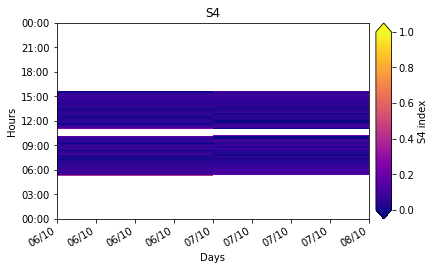

In [20]:
fig, ax = plt.subplots()

cmap = "plasma"
im = ax.imshow(s4_array, cmap=cmap, extent=[x_lims[0], x_lims[1],  y_lims[0], y_lims[1]], aspect = 'auto', vmin=0, vmax=1)
ax.set(xlabel="Days", ylabel="Hours", title="S4")
#ax.grid()
ax.xaxis_date()
ax.yaxis_date()

date_format1 = mdates.DateFormatter('%d/%m')
ax.xaxis.set_major_formatter(date_format1)

date_format2 = mdates.DateFormatter('%H:%M')
ax.yaxis.set_major_formatter(date_format2)
fig.autofmt_xdate()

# Legend 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) # pad es el espaciado con la grafica principal
plt.colorbar(im,cax=cax,label='S4 index',extend='both')
    
plt.show()